# **Treinamento de modelo com dataset do Roboflow**

## Importando as dependências

In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 111.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
from ultralytics import YOLO

## Definindo o acesso ao workspace do Roboflow

In [3]:
rf = Roboflow(api_key="9SjWYX64tt82FejecMYx")
project = rf.workspace("sunawork").project("initialsmodel-6bb5v")
version = project.version(7)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to InitialsModel-7 in yolov8:: 100%|██████████| 288/288 [00:00<00:00, 11643.10it/s]


In [4]:
# Carrega um modelo YOLOv8 pré-treinado para iniciar
model = YOLO('yolov8n.pt')

# Inicia o treinamento
results = model.train(data=f'{dataset.location}/data.yaml', epochs=50, imgsz=640)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/InitialsModel-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

In [13]:
# Define o caminho do modelo que ele vai utilizar
caminho_do_modelo = 'runs/detect/train/weights/best.pt'

# Define a imagem escolhida para realizar o teste
caminho_da_imagem = '/content/570ee4c32a57d0bb353f00c708e5fae7.jpg'

## Testando com a amostra direto na célula


image 1/1 /content/images (2).jpg: 640x640 1 squirtle, 8.5ms
Speed: 2.3ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


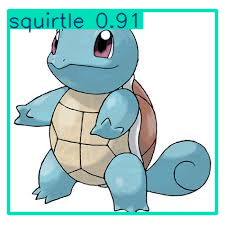

In [16]:
from google.colab.patches import cv2_imshow

# Carrega seu modelo
model = YOLO('runs/detect/train/weights/best.pt')

# Faz a predição
results = model.predict('/content/images (2).jpg')

imagem_com_deteccoes = results[0].plot()

# A função cv2_imshow exibe essa imagem
cv2_imshow(imagem_com_deteccoes)

## Realizando o teste com a imagem baixada

In [15]:
# Carrega o seu modelo treinado
model = YOLO(caminho_do_modelo)

# Faz a predição na imagem nova
results = model.predict(caminho_da_imagem, conf=0.8)
nome_do_arquivo_de_saida = 'resultado_teste.jpg'
results[0].save(filename=nome_do_arquivo_de_saida)

print(f"✅ Teste concluído!")
print(f"O resultado foi salvo na imagem: '{nome_do_arquivo_de_saida}'")


image 1/1 /content/570ee4c32a57d0bb353f00c708e5fae7.jpg: 608x640 (no detections), 7.9ms
Speed: 2.4ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)
✅ Teste concluído!
O resultado foi salvo na imagem: 'resultado_teste.jpg'
